**1.Déploiement de l'environnement**

In [106]:
#1 importation des bibliothèques 
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import random 

#2 Manipulation des données
#ouverture des fichiers
#lecture fichier csv
creditcsv = pd.read_csv("credit_immo.csv",sep = ",")
creditcsv

#ouverture fichier xls
creditxls = pd.read_excel("credit_immo.xls")
creditxls

#ouverture fichier json
creditjson = pd.read_json('credit_immo.json')
creditjson

creditcsv




,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


**2.Sources de données : Manipulation**

In [107]:
#création d'une Base de données de 4 colonnes taux_de_ventes, croissance_vente, ratio_benefice, ratio_perte et 6 lignes
bdd = pd.DataFrame(np.random.randn(6,4),index=[0,1,3,4,6,7],columns=["taux_de_ventes", "croissance_vente", "ratio_benefice", "ratio_perte"])
#tirage aléatoire de valeurs pour la base de données
# rand : valeurs positives uniquement | randn : valeurs + et -
bdd = bdd.reindex([0, 1, 2, 3, 4, 5])
#reindex permet de réindexer la bdd en mettant la valeur NAN pour les index n'ayant pas de valeurs


pd.isnull(bdd)
#remplace les NAN par des 0
#bdd = bdd.fillna(0)
#supprime toutes les lignes à NAN
bdd.dropna(how='any')


 



,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.927555,0.569793,0.226117,0.639242
1,-1.674378,-1.278838,-1.308114,1.678993
3,0.104249,0.016453,0.978496,-0.569705
4,-2.336518,-0.949830,-0.659555,-0.721217


**3.Traitement des données**

In [108]:
#1 importation des bibliothèques 
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import random 

#2 Manipulation des données
#ouverture des fichiers
#lecture fichier csv
creditcsv = pd.read_csv("credit_immo.csv",sep = ",")

#permet de voir le nombre de valeur manquantes par colonne
#pd.isnull(creditcsv).sum()



creditcsv





,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


**Transformer les valeurs manquantes en moyenne (SimpleImputer).**

In [109]:

# on utilise la méthode "SimpleImputer" pour remplacer les valeurs nan par la moyenne des valeurs de la bdd

#Création de la matrices des variables explicatives
X=creditcsv.iloc[:,1:-1].values
#print(X)

#Création de notre variable expliquée: la solvabilité des clients
Y=creditcsv.iloc[:,-1].values
#print(Y)

#Méthode Simple Imputer sur la colonne Niv_etude_Bac: on remplace NAN par la moyenne des valeurs de la colonne
#print(X[:,0:1])
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')
#Application sur notre fichier creditcsv
imputer.fit(X[:,0:1])
X[:,0:1]=imputer.fit_transform(X[:,0:1])
#print("**************************************************************************")
#print(X[:,0:1])

#Méthode Simple Imputer sur la colonne enfant_a_charge: on remplace NAN par la moyenne des valeurs de la colonne
#print(X[:,-1:])
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')
#Application sur notre fichier creditcsv
imputer.fit(X[:,-1:])
X[:,-1:]=imputer.fit_transform(X[:,-1:])
print("**************************************************************************")
#print(X[:,-1:])
print(X)




**************************************************************************
[[3.0 45 'CDI' 40000 4000 'M' 0.3 3.0]
 [5.0 28 'CDI' 30500 1320 'M' 0.1 0.0]
 [0.0 55 'CDI' 28000 40000 'C' 0.0 0.0]
 [4.0 23 'CDD' 15000 0 'M' 0.1 1.3333333333333333]
 [0.0 33 'CDD' 27000 3000 'C' 0.1 2.0]
 [0.0 41 'INTERIM' 40000 1000 'M' 0.0 4.0]
 [-1.0 29 'CDI' 50000 3000 'C' 0.0 0.0]
 [-3.0 24 'INTERIM' 29000 5000 'C' 0.0 0.0]
 [1.4444444444444444 26 'CDI' 44000 0 'M' 0.1 1.0]
 [3.0 37 'CDI' 45800 2000 'M' 0.2 2.0]
 [2.0 40 'CDI' 60000 1500 'M' 0.3 3.0]
 [0.0 38 'CDD' 26000 8000 'C' 0.4 0.0]
 [-3.0 39 'INTERIM' 29000 4900 'M' 0.0 1.0]
 [0.0 31 'CDI' 43000 100000 'M' 0.2 2.0]
 [1.0 70 'CDD' 45000 17000 'C' 0.3 0.0]
 [0.0 42 'ENTRPRENEUR' 70000 26000 'M' 0.2 0.0]
 [8.0 46 'CDI' 80000 8000 'M' 0.0 3.0]
 [3.0 23 'CDI' 100000 0 'M' 0.3 1.0]
 [4.0 32 'CDI' 21000 1200 'M' 0.1 2.0]]


**Encoder les valeurs catégoriques (LabelEncoder).**

In [110]:
#Encodage des variables qualitatives en les transformant en données numériques
#Méthode avec LabelEncoder

LabEnc_X = LabelEncoder()

print(X[:,2])
#Encodage de la colonne 3 du tableau qui est catégorielle --> 4 catégories donc 0,1,2,3 
X[:,2]=LabEnc_X.fit_transform(X[:,2])
print("***************")
print(X[:,2])

print(X[:,5])
#Encodage de la colonne 6 du tableau qui est catégorielle --> 2 catégories donc 0, 1
X[:,5]=LabEnc_X.fit_transform(X[:,5])
print("***************")
print(X[:,5])



['CDI' 'CDI' 'CDI' 'CDD' 'CDD' 'INTERIM' 'CDI' 'INTERIM' 'CDI' 'CDI' 'CDI'
 'CDD' 'INTERIM' 'CDI' 'CDD' 'ENTRPRENEUR' 'CDI' 'CDI' 'CDI']
***************
[1 1 1 0 0 3 1 3 1 1 1 0 3 1 0 2 1 1 1]
['M' 'M' 'C' 'M' 'C' 'M' 'C' 'C' 'M' 'M' 'M' 'C' 'M' 'M' 'C' 'M' 'M' 'M'
 'M']
***************
[1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1]


**Fractionner le jeu de données pour l’entrainement et le test (Training and Test set).**

In [84]:
#Création de notre échantillon Test qui correspond à 20% de nos données (X_test et Y_test)
#et de nos données d'apprentissage sur lequel le modèle va être entraîner (random_state est l'état aléatoire)
X_app, X_test, Y_app, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_app.shape,X_test.shape,Y_app.shape,Y_test.shape)


(15, 8) (4, 8) (15,) (4,)


**mise à l’échelle des features (StandardScaler).**

In [87]:
#Cette technique part du principe que les données sont normalement distribuées(suivent une loi normale).
#La fonction va recalculer chaque caractéristiques afin que les données soient centré autour de 0 (mean=0 et Std=1)

#On applique cette technique aux variables explicatives de notre échantillon test.
scaler = StandardScaler()

print(X_test)


X_test = scaler.fit_transform(X_test)
print("=====================================")
print(X_test)


[[2.0 40 1 13 1500 1 0.3 3.0]
 [5.0 28 1 6 1320 1 0.1 0.0]
 [1.4444444444444444 26 1 9 0 1 0.1 1.0]
 [4.0 32 1 1 1200 1 0.1 2.0]]
[[-0.76809537  1.58525817  0.          1.31267933  0.83901318  0.
   1.73205081  1.34164079]
 [ 1.30576213 -0.65275337  0.         -0.28536507  0.53391748  0.
  -0.57735027 -1.34164079]
 [-1.15214306 -1.02575529  0.          0.3995111  -1.703451    0.
  -0.57735027 -0.4472136 ]
 [ 0.6144763   0.09325048  0.         -1.42682536  0.33052034  0.
  -0.57735027  0.4472136 ]]


**4.Visualisation de données**

In [113]:
#1 importation des bibliothèques 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


#ouverture du fichier
#lecture fichier csv
montantcsv = pd.read_csv("Montant_Temps.csv",sep = ",")
montantcsv


,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


In [114]:
#Création de la matrices de la variable explicative!Le temps
X=montantcsv.iloc[:,1].values
print(X)

#Création de notre variable expliquée: le montant du capital
Y=montantcsv.iloc[:,0].values
print(Y)


[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[ 1 12 13  2  3  0  1  6  7  4  5 26 27 24 25 30 31 28 29 18 19 16 17 22
 23 20 21 42 43 40 41 46 47 44 45 34 35 32 33 38 39 36 37 58 59]


**Graphique du montant du capitale en fonction du temps**

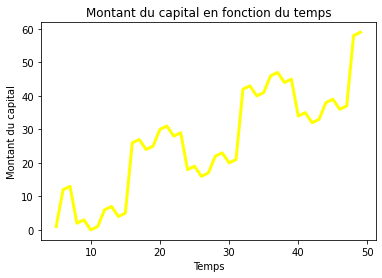

In [127]:
plt.plot(X,Y, c="yellow", lw=3)

plt.title('Montant du capital en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('Montant du capital')

plt.savefig('courbe.png')
#plt.show()


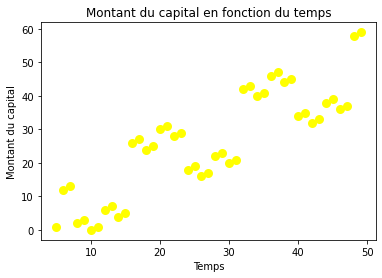

In [128]:
plt.scatter(X,Y, c="yellow", lw=3)

plt.title('Montant du capital en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('Montant du capital')

plt.savefig('Nuage de points.png')

In [135]:

#Corrélation entre le montant du capital et le temps
montantcsv.corr()



,Montant_du_capitale,Temps
Montant_du_capitale,1.000000,0.852477
Temps,0.852477,1.000000


**On a une bonne corrélation entre notre variable expliquée, le montant du capital et notre variable explicative (le temps) puisque  la corrélation est de 0.85**

In [134]:
montantcsv.Montant_du_capitale.cov(montantcsv.Temps)

176.13636363636365

**La covariance est positive, ce qui signifie que les deux variables évoluent dans le même sens.**

**5.Analyse de données**

**5.1 Mesure de tendance centrale**

In [4]:
#1 importation des bibliothèques 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


#ouverture du fichier
#lecture fichier csv
tendancecsv = pd.read_csv("tendance_centrale.csv",sep = ",")
tendancecsv



,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


In [137]:
#Calcul de la moyenne de la distribution
tendancecsv.mean()

Age       45.647059
Rating     4.438824
dtype: float64

In [139]:
#calcul de la médiane de la distribution
tendancecsv.median()

Age       49.0
Rating     4.3
dtype: float64

In [165]:
#Calcul du mode
tendancecsv.mode()


,Nom,Age,Rating
0,perez,53.0,3.78
1,NaN,NaN,3.95
2,NaN,NaN,4.30
3,NaN,NaN,4.80
4,NaN,NaN,5.98


**On obtient pour le mode (fréquence max de la distribution) un age de 53ans et un Rating de 3.78.
Le nom qui apparaît le plus fréquemment est perez.On observe que la moyenne, la médiane et le mode de la distribution
ne sont pas égales, ce qui signifie la distribution ne suit pas une loi Normale.**

**5.2 Analyse de la variance**

**On va réaliser une ANOVA (Analyse de la variance) à 1 facteur**

**On veut étudier ici l'influence du Rating en fonction de l'age.**

**On peut visualiser l'influence du rating en affichant ces boîtes à moustaches :**


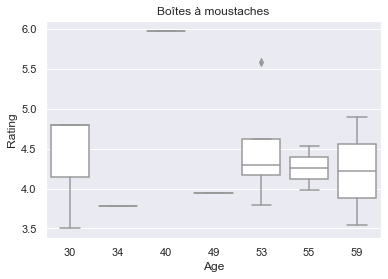

In [5]:
sns.set()

ax = sns.boxplot(x="Age", y="Rating", data=tendancecsv, color='white')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Boîtes à moustaches')
plt.show()

**Au vue des boîtes à moustaches , il est difficile de connaître l'influence du Rating en fonction de l'âge. 
Ces disparités semblent moins significatives sur la tranche d'âge des 53 à 59 ans.
La méthode ANOVA va nous permettre d'avoir plus d'informations** 

In [7]:
anova_Age = smf.ols('Rating~Age', data=tendancecsv).fit()
print(anova_Age.summary())
sm.stats.anova_lm(anova_Age, typ=2)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                   0.07224
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.792
Time:                        14:38:18   Log-Likelihood:                -19.781
No. Observations:                  17   AIC:                             43.56
Df Residuals:                      15   BIC:                             45.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6747      0.900      5.194      0.0

C:\Users\utilisateur\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,sum_sq,df,F,PR(>F)
Age,0.049125,1.0,0.072237,0.791769
Residual,10.200851,15.0,NaN,NaN


**Ce qui nous intéresse plus particulièrement est le résultat fourni par le test de Fisher.
On trouve ici une p-valeur de 0.791, ce qui est très au-dessus de 5 %. 
On ne rejette donc pas l'hypothèse H0 selon laquelle α1=α2=0
Il n'y a pas ici d'effet significatif de l'âge sur le Rating.**

**5.3 Analyse de corrélations**

**5.3.1 Analyse graphique de la corrélation entre les variables explicatives et la variable expliquée


On souhaite étudier ici les relations pouvant exister au sein de différentes espèces d'iris en fonction 
des dimensions de leurs sepales et de leurs pétales**

In [111]:
#importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
import scipy.stats 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


iris = pd.read_csv('./iris.csv', sep = ",")
iris





,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [113]:
Y = iris.iloc[:,-1].values 
#print(Y)
#La matrice des variables explicatives X correspondent aux dimensions des sépales et pétales
#on prend toutes les colonnes sauf la dernière
#X = iris.iloc[:,:-1].values
#print(X)

#LabEnc_Y = LabelEncoder()

#print(Y[:,-1])
#Encodage de la colonne des espèces du tableau qui est catégorielle 
#Y[:,-1]=LabEnc_Y.fit_transform(Y[:,-1])
#print("***************")
#print(Y[:,-1])

#encodage de la colonne espèce, variable qualitative.
quanti= LabelEncoder()
#Création d'une nouvelle colonne espece_code correspondant au code attribué à chaque espèce
iris['espece_code']=quanti.fit_transform(iris.espèce)
iris




,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce,espece_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


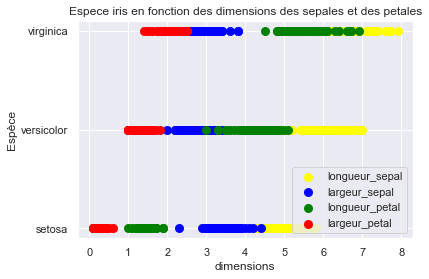

<Figure size 432x288 with 0 Axes>

In [41]:
#Nuage de points des différentes espèces d'Iris en fonction des dimensions

plt.title('Espece iris en fonction des dimensions des sepales et des petales')
plt.xlabel('dimensions')
plt.ylabel('Espèce')

#longueur_sepal 	largeur_sepal 	longueur_petal 	largeur_petal 	espèce
           
y=iris.loc[:,'espèce']
x=iris.loc[:,'longueur_sepal']
plt.scatter(x,Y, c="yellow", label='longueur_sepal', lw=3)

y=iris.loc[:,'espèce']
x=iris.loc[:,'largeur_sepal']
plt.scatter(x,Y, c="blue", label='largeur_sepal', lw=3)

y=iris.loc[:,'espèce']
x=iris.loc[:,'longueur_petal']
plt.scatter(x,Y, c="green", label='longueur_petal', lw=3)

y=iris.loc[:,'espèce']
x=iris.loc[:,'largeur_petal']
plt.scatter(x,Y, c="red", label='largeur_petal', lw=3)

plt.legend()
plt.show()


   
plt.savefig('Nuage de points.png')

Les nuages de points nous permettent de visualiser les différentes caractéristiques dimensionelles des 
variétés d'iris présentées ici. On remarque par exemple, que l'espèce d'iris Virginica possèdent de manière générale des sépales
et des pétales de tailles plus grandes que les autres variétés d'iris (Versicolor et Setosa).
on peut distinguer qu'une Setosa possède une largeur de Sépales inférieure aux autres fleurs de la même espèce.
Contrairement aux autres espèces, la variété Setosa a une largeur de sépales supérieure a la longueur de ses pétales, beaucoup
plus petites que les autes variétés d'iris.


**5.3.2 Analyse mathématique**

**Fractionner le jeu de données pour l’entrainement et le test (Training and Test set).**

In [52]:
#Création de notre échantillon Test qui correspond à 20% de nos données (X_test et Y_test)
#et de nos données d'apprentissage sur lequel le modèle va être entraîner (random_state est l'état aléatoire)
X_app, X_test, Y_app, Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_app.shape,X_test.shape,Y_app.shape,Y_test.shape)


(120, 4) (30, 4) (120,) (30,)


In [115]:
#Création du modèle
model=LogisticRegression()
#entrainement du modèle dur 80% des données.
model.fit(X_app,Y_app)

#prédiction sur l'echantillon test de 20%
predictions=model.predict(X_test)
print(predictions)
print(Y_test)

#Evaluation du modèle sur l'echantillon
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))



['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Le coefficient de corrélation de Pearson permet d'analyser les relations linéaires entre les variables.**

In [114]:
#détermination du coefficient de corrélation de Pearson.
from scipy import stats


iris.corr(method='pearson')

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece_code
longueur_sepal,1.000000,-0.117570,0.871754,0.817941,0.782561
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
longueur_petal,0.871754,-0.428440,1.000000,0.962865,0.949035
largeur_petal,0.817941,-0.366126,0.962865,1.000000,0.956547
espece_code,0.782561,-0.426658,0.949035,0.956547,1.000000


**Si l'on s'intéresse plus particulièrement à la dernière colonne du tableau, on peut voir qu'il existe une forte corrélation
linéaire positive entre les especes d'iris et certaines variables expplicatives et plus particulièrement la longueur et
la largeur des pétales avec des coefficients de corrélation respectivement de 0.96 et 0.95.**  